# Polynomial Regression

In many cases, the trend of data is not really linear, and looks curvy. In this case, we can use Polynomial regression, going from quadratic, cubic to all the way to infinity. In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say we want to have a polynomial regression (let's make 2 degree polynomial)

$\hat{y} =  \theta_0+ \theta_1  x + \theta_2 x^2$

Now, the question is how we can fit our data on this equation while we have only x values ? Well, we can create a few additional features: 1, $x$, and $x^2$.

A polynomial regression model can be transformed into linear regression model, where the polynomial orders of our current features become our new features. We can define $x_1 = x $, $x_2 = x^2$ and so on. Then the degree 2 equation will turn into:

$\hat{y} = \theta_0 + \theta_1  x_1 + \theta_2 x_2$ : our new features are $x_1$ and $x_2$

Now, we can deal this polynomial regression as 'linear regression' problem, and can use the same mechanism as linear regression to solve such problems. Thus, this polynomial regression is considered to be a special case of traditional multiple linear regression.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

We use the same fuel-consumption and Co2 emissions dataset as in Simple Linear Regression notebook

In [2]:
df = pd.read_csv('fuel_consumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features for our regression exercise

In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [5]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [6]:
msk = np.random.rand(len(df)) < 0.8                # splitting the data into train-test datasets
train = cdf[msk]
test = cdf[~msk]

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2). These become our new features for the regression. 

In [8]:
plr = linear_model.LinearRegression()
plr.fit(train_x_poly, train_y)
print(plr.intercept_, plr.coef_)

[105.9680533] [[ 0.         51.18109491 -1.60563891]]


Let's visualize the fitting

Text(0, 0.5, 'Co2 Emission')

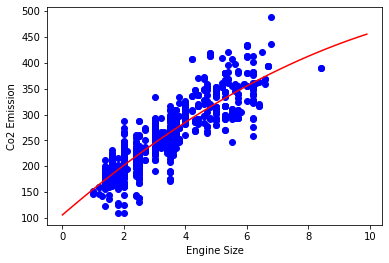

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
x_fit = np.arange(0.0, 10.0, 0.1)
y_fit = plr.intercept_ + plr.coef_[0][1]*x_fit + plr.coef_[0][2]*np.power(x_fit,2)
plt.plot(x_fit, y_fit ,'-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')

Now, lets evaluate the peformance of the model on the test data

In [10]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_pred = plr.predict(test_x_poly)

print('Mean absolute error : %.2f' % np.mean(np.absolute(test_y_pred - test_y)))
print('Residual sum of squares (MSE) : %.2f' % np.mean((test_y_pred - test_y)**2))
print('R2-score : %.2f' % r2_score(test_y_pred, test_y))

Mean absolute error : 22.53
Residual sum of squares (MSE) : 857.81
R2-score : 0.71
